<a href="https://colab.research.google.com/github/kaisarmasum/Quantum-Machine-Learning/blob/main/Bengali_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
import pandas as pd
df = pd.read_excel("ok.xlsx")

In [ ]:
df=df.drop("News Type",axis=1)


In [ ]:
df.head(14)

,Headline,Sentiment
0,‘১২ মাসের নমনীয়’ সময়ের দিকে যেতে পারে ব্রেক্সিট,1
1,‘২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন’,1
2,"‘২০০’ ডাকছে, তামিম রাঙাতে পারবেন তো?",1
3,‘২০টি মডেল ভবন তৈরি করে দেখান’,1
4,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’,0
5,‘৯০ মাইল বেগে বল করলেই গ্রেট হওয়া যায় না’,1
6,‘অধ্যক্ষ সিরাজকে আপত্তিকর অবস্থায় দেখা গেছে’,0
7,‘অননুমেয়’ পাকিস্তানে ভয় সৌরভ-শচীনের,0
8,‘অনিল আম্বানির হয়ে দালালি করেছেন মোদি’,0
9,"‘অনুরোধ, প্রযোজকের টাকা সঠিক খরচ করবেন’",1


In [ ]:
len(df)

1619

In [ ]:
df

,Headline,Sentiment
0,‘১২ মাসের নমনীয়’ সময়ের দিকে যেতে পারে ব্রেক্সিট,1
1,‘২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন’,1
2,"‘২০০’ ডাকছে, তামিম রাঙাতে পারবেন তো?",1
3,‘২০টি মডেল ভবন তৈরি করে দেখান’,1
4,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’,0
...,...,...
1614,ঘুষ দিয়ে ভোট কিনছেন মে!,0
1615,"ঘুষ না দেওয়ায় হয়রানি, দুদকের অভিযান",0
1616,ঘুষের টাকাসহ দুদকের হাতে গ্রেপ্তার মৎস্য কর্মক...,0
1617,ঘূর্ণিঝড় ফণী: ৮ লাখ বাসিন্দা সরিয়েছে ভারত,0


In [ ]:
import string
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [ ]:
x = df['Headline'].apply(remove_punc)
y = df['Sentiment']
x.shape

(1619,)

In [ ]:
x.shape

(1619,)

In [ ]:
contractions = {
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}


In [ ]:
import re
import string
from collections import Counter
vocab = Counter()
def clean_text(x,remove_stopwords = False):
    if True:
        new_text = []
        for word in x:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        x = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}:\"|\'\~`<>/,€¦!?½£¶™¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"

    x = re.sub(bangla_digits, " ", x)
    x = re.sub(punc, " " ,x)
    x = re.sub(english_chars, " ", x)
    x = re.sub(bangla_fullstop, " ", x)
    x = re.sub(punctSeq," ", x)
    x = whitespace.sub(" ",x).strip()
    x = x.strip("/")

    if remove_stopwords:
        k = []
        with open('Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            x = [t for t in x if t not in k]
            x = "".join(x)


    return x

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [ ]:
vocab = CountVectorizer(analyzer=clean_text).fit(x)

In [ ]:
print(len(vocab.vocabulary_))

65


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

In [ ]:
len(x_train)

1295

In [ ]:
len(x_test)

324

In [ ]:
df

,Headline,Sentiment
0,‘১২ মাসের নমনীয়’ সময়ের দিকে যেতে পারে ব্রেক্সিট,1
1,‘২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন’,1
2,"‘২০০’ ডাকছে, তামিম রাঙাতে পারবেন তো?",1
3,‘২০টি মডেল ভবন তৈরি করে দেখান’,1
4,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’,0
...,...,...
1614,ঘুষ দিয়ে ভোট কিনছেন মে!,0
1615,"ঘুষ না দেওয়ায় হয়রানি, দুদকের অভিযান",0
1616,ঘুষের টাকাসহ দুদকের হাতে গ্রেপ্তার মৎস্য কর্মক...,0
1617,ঘূর্ণিঝড় ফণী: ৮ লাখ বাসিন্দা সরিয়েছে ভারত,0


In [ ]:
x_train_dtm = vocab.transform(x_train).toarray()
x_test_dtm = vocab.transform(x_test).toarray()

In [ ]:
x_train_dtm

array([[35,  0,  0, ...,  0,  0,  0],
       [35,  0,  0, ...,  0,  0,  0],
       [38,  0,  0, ...,  0,  0,  0],
       ...,
       [20,  0,  0, ...,  0,  0,  0],
       [44,  0,  0, ...,  0,  0,  0],
       [38,  0,  0, ...,  0,  0,  0]])

In [ ]:
y_test

490     1
1241    1
1141    1
758     0
1272    1
       ..
664     1
466     1
1408    1
1255    0
1042    1
Name: Sentiment, Length: 324, dtype: int64

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
pred = model.predict(x_test_dtm)

In [ ]:
accuracy_score(y_test,pred)

0.7222222222222222

In [ ]:
pred2 = model.predict(x_train_dtm)

In [ ]:
accuracy_score(y_train,pred2)

0.715057915057915

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.16      0.24        90
           1       0.74      0.94      0.83       234

    accuracy                           0.72       324
   macro avg       0.62      0.55      0.53       324
weighted avg       0.68      0.72      0.67       324



In [ ]:
!pip install qiskit-ibmq-provider
!pip install qiskit_machine_learning==0.6.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux

In [ ]:
from sklearn.decomposition import KernelPCA
kernel_pca_rbf = KernelPCA(n_components=2, kernel="rbf")
kernel_pca_rbf.fit(x_train_dtm)
train_features_rbf = kernel_pca_rbf.transform(x_train_dtm)
test_features_rbf = kernel_pca_rbf.transform(x_test_dtm)

In [ ]:
from qiskit.circuit.library import ZZFeatureMap,PauliFeatureMap
num_features = train_features_rbf.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1, entanglement = 'linear',
insert_barriers =True)
feature_map.draw()

┌──────────────────────────┐
q_0: ┤0                         ├
     │  ZZFeatureMap(x[0],x[1]) │
q_1: ┤1                         ├
     └──────────────────────────┘

In [ ]:
#feature_map.decompose().draw(output='mpl')

In [ ]:
print(feature_map.decompose().decompose().depth())

5


In [ ]:
from qiskit import Aer, execute
from qiskit import IBMQ

IBMQ.save_account('b97c4453266ade71c400ed517b83e3162b9e9751a911afdb92772582b0c26dab7f58b1e0ecc4e343a3324b6da8827319a1afd0025746cbfe3bfb15bdfd82e15f')
IBMQ.load_account()
IBMQ.providers()

<ipython-input-32-8e8331eb1691>:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('b97c4453266ade71c400ed517b83e3162b9e9751a911afdb92772582b0c26dab7f58b1e0ecc4e343a3324b6da8827319a1afd0025746cbfe3bfb15bdfd82e15f')
<ipython-input-32-8e8331eb1691>:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account('b97c4453266ade71c400ed517b83e3162b9e9751

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
backend = provider.get_backend('ibm_kyoto')

In [ ]:
from qiskit_machine_learning.kernels import QuantumKernel
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=backend)

In [ ]:
%%time
quantum_svc = SVC(kernel=quantum_kernel.evaluate)
quantum_svc.fit(train_features_rbf, y_train)

QiskitError: "job id: cpmaqnpdmm10008nzqr0, status: 'FAIL_TO_GET_STATUS' Unknown error: ('status')"

In [ ]:
%%time
quantum_score = quantum_svc.score(test_features_rbf, y_test)
print(f" Callable quantum kernel classification test score: {quantum_score}")

 Callable quantum kernel classification test score: 0.7142857142857143
CPU times: user 5.4 s, sys: 256 ms, total: 5.66 s
Wall time: 5.34 s


In [ ]:
%%time
quantum_score = quantum_svc.score(train_features_rbf, y_train)
print(f" Callable quantum kernel classification train score: {quantum_score}")

 Callable quantum kernel classification train score: 0.625
CPU times: user 6.06 s, sys: 107 ms, total: 6.17 s
Wall time: 6.11 s


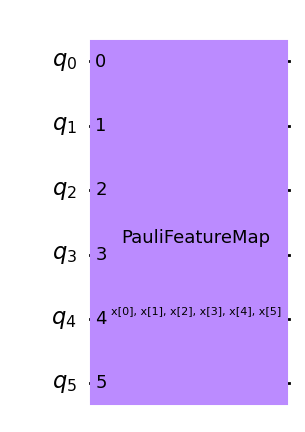

In [ ]:
feature_map2 = PauliFeatureMap(num_features, reps=1, paulis=['Z', 'XX'])
feature_map2.draw()

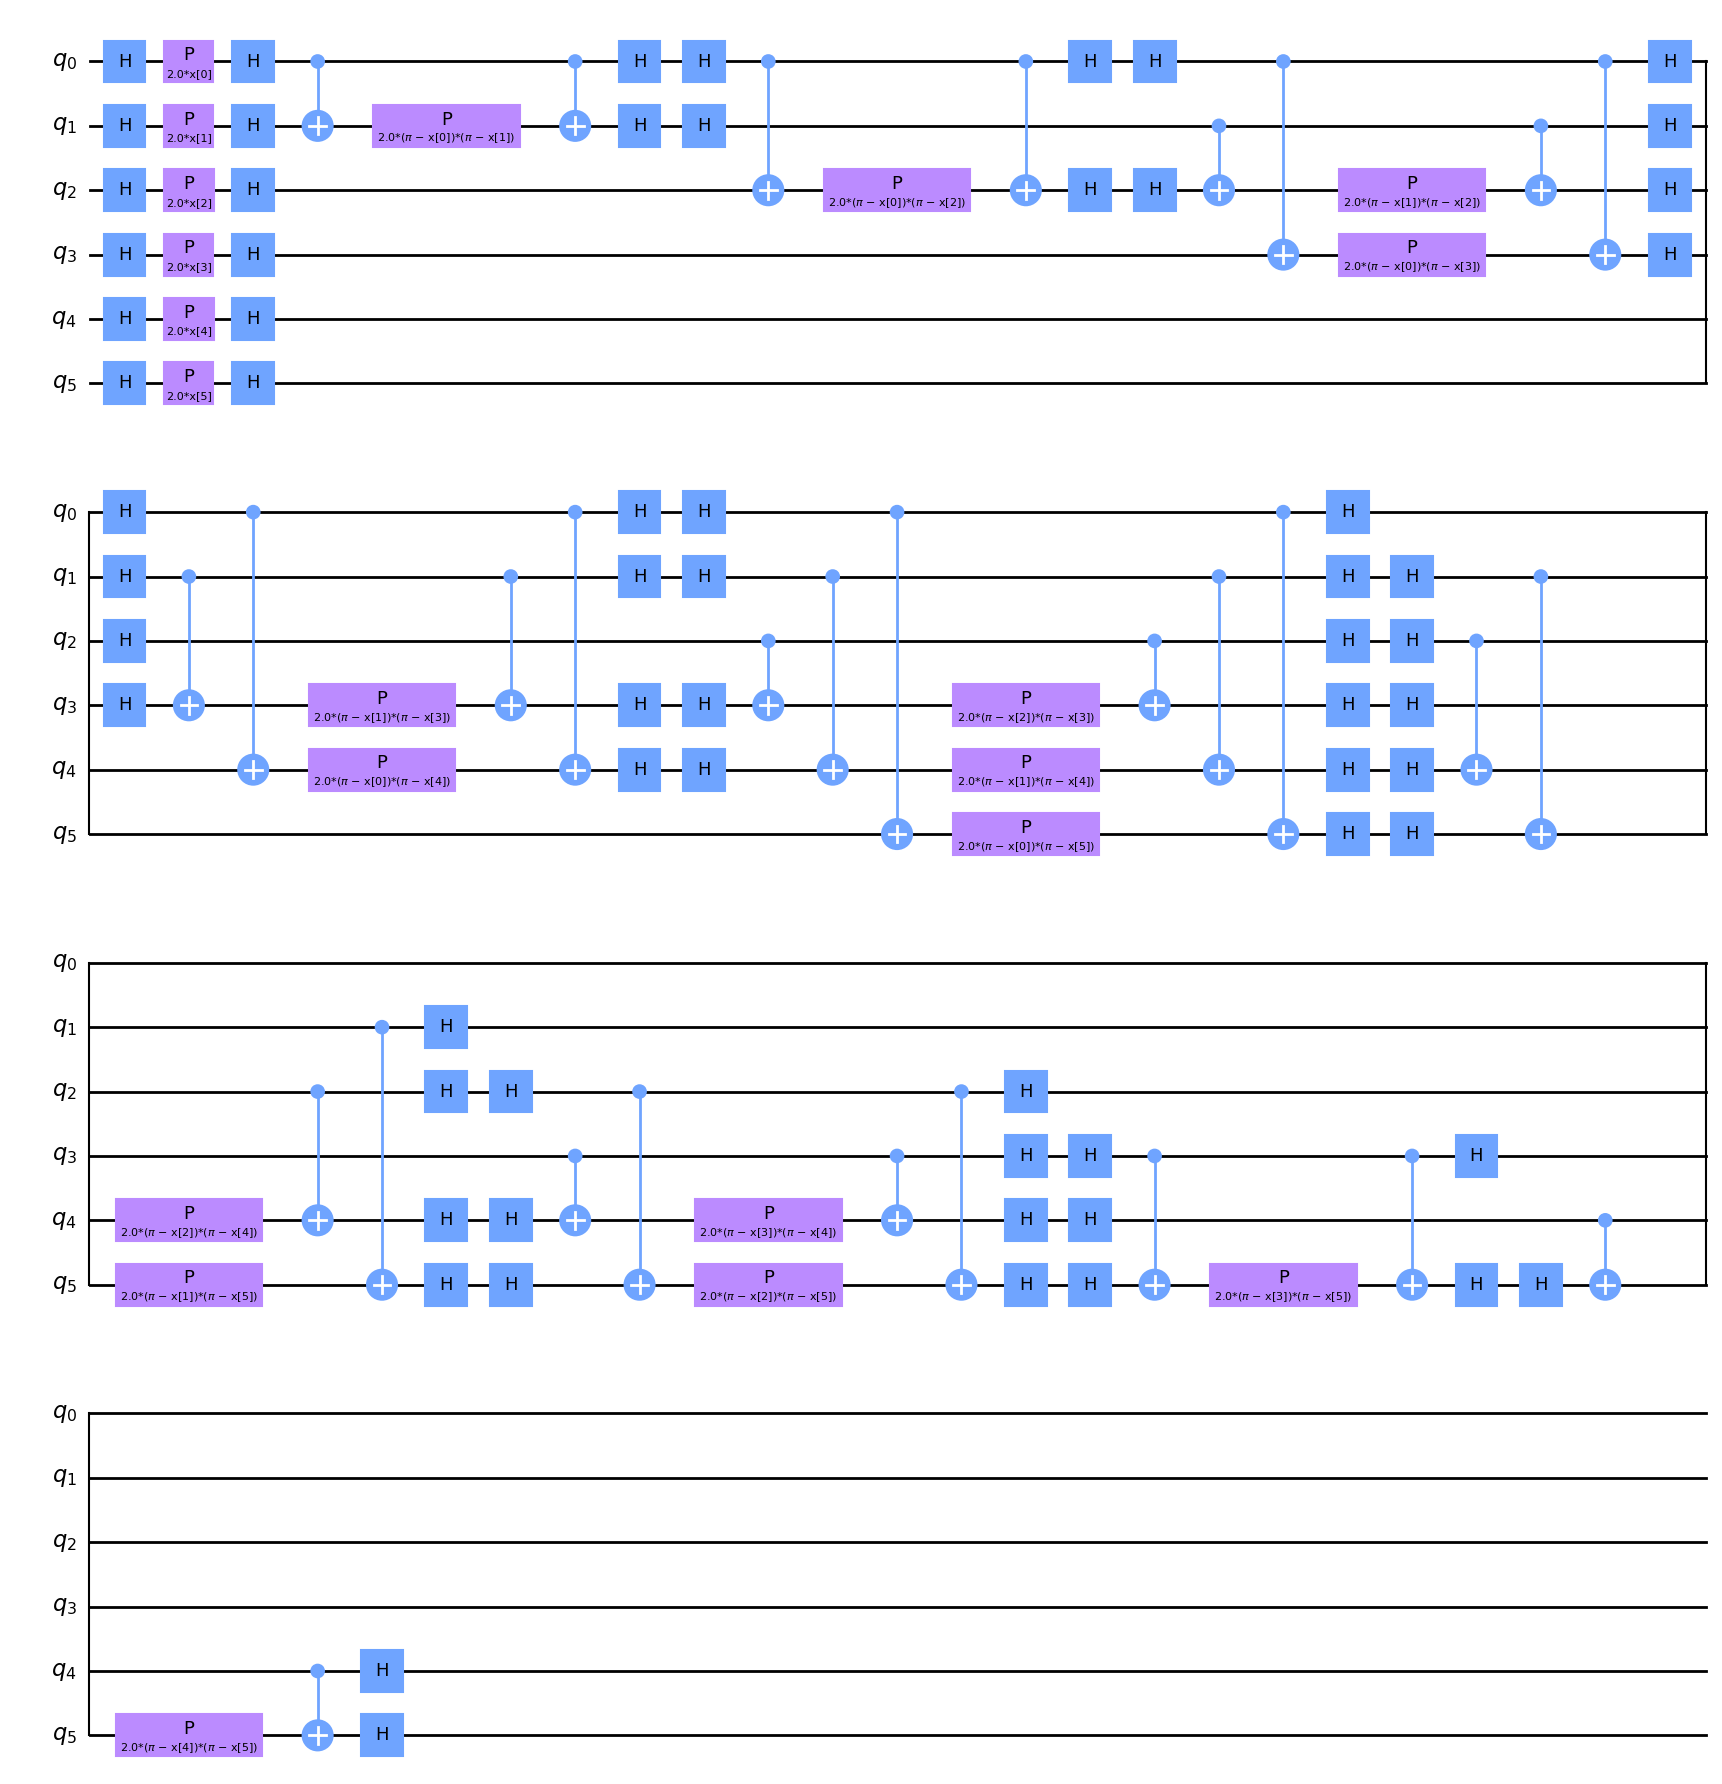

In [ ]:
feature_map2.decompose().draw(output='mpl')

In [ ]:
from qiskit import Aer, execute
backend = Aer.get_backend("qasm_simulator")

In [ ]:
from qiskit_machine_learning.kernels import QuantumKernel
quantum_kernel2 = QuantumKernel(feature_map=feature_map2, quantum_instance=backend)

In [ ]:
%%time
quantum_svc2 = SVC(kernel=quantum_kernel2.evaluate)
quantum_svc2.fit(train_features_rbf, y_train)

CPU times: user 5.97 s, sys: 155 ms, total: 6.12 s
Wall time: 6.07 s


SVC(kernel=<bound method QuantumKernel.evaluate of <qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7fd284b43b50>>)

In [ ]:
quantum_score2 = quantum_svc2.score(test_features_rbf, y_test)
print(f" Callable quantum kernel classification test score: {quantum_score2}")

 Callable quantum kernel classification test score: 0.7142857142857143


In [ ]:
quantum_score2 = quantum_svc2.score(train_features_rbf, y_train)
print(f" Callable quantum kernel classification train score: {quantum_score2}")

 Callable quantum kernel classification train score: 0.625


QSVM

In [ ]:
from qiskit_machine_learning.algorithms import QSVC

In [ ]:
%%time

qsvc = QSVC(quantum_kernel=quantum_kernel)
qsvc.fit(train_features_rbf,y_train)

CPU times: user 6.37 s, sys: 490 ms, total: 6.86 s
Wall time: 6.36 s


QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7fd282ea3a00>,
     random_state=None, shrinking=True, tol=0.001, verbose=False)

In [ ]:
quantum_score2 = qsvc.score(test_features_rbf, y_test)
print(f" Callable quantum kernel classification test score: {quantum_score2}")

 Callable quantum kernel classification test score: 0.7142857142857143


In [ ]:
quantum_score2 = qsvc.score(train_features_rbf, y_train)
print(f" Callable quantum kernel classification train score: {quantum_score2}")

 Callable quantum kernel classification train score: 0.625


QSVM with Pauli Features Map

In [ ]:
%%time
qsvc = QSVC(quantum_kernel=quantum_kernel2)
qsvc.fit(train_features_rbf,y_train)

In [ ]:
quantum_score2 = qsvc.score(test_features_rbf, y_test)
print(f" Callable quantum kernel classification test score: {quantum_score2}")

In [ ]:
quantum_score2 = qsvc.score(train_features_rbf, y_train)
print(f" Callable quantum kernel classification train score: {quantum_score2}")

VQC

In [ ]:
!python3.10 -m pip install qiskit_machine_learning
!pip install nlopt --no-clean


[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
  Using cached nlopt-2.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (423 kB)

[notice] A new release of pip available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


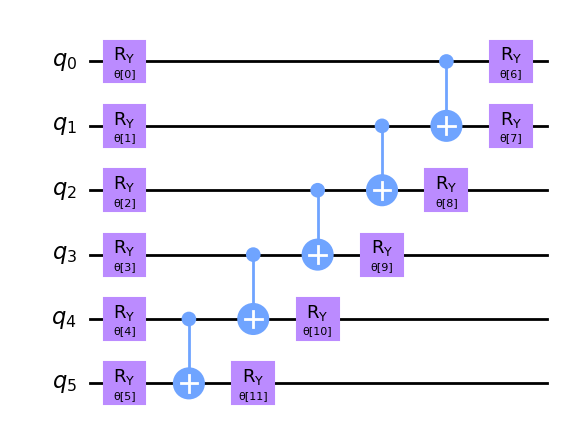

In [ ]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features, reps=1)
ansatz.decompose().draw(output="mpl", fold=20)

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

count = 0
def callback_graph(weights, obj_func_eval):
    global count
    count+=1
    print(count)
    # clear_output(wait=True)
    # objective_func_vals.append(obj_func_eval)
    # plt.title("Objective function value against iteration")
    # plt.xlabel("Iteration")
    # plt.ylabel("Objective function value")
    # plt.plot(range(len(objective_func_vals)), objective_func_vals)
    # plt.show()

In [ ]:

from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.algorithms.optimizers import ISRES, ADAM
from qiskit.primitives import Sampler

sampler = Sampler()
#optimizer = optimizer = ADAM(maxiter = 100)
optimizer = ISRES(max_evals=100)

In [ ]:
%%time


vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
vqc.fit(train_features_rbf, y_train.values.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
CPU times: user 16.6 s, sys: 76.4 ms, total: 16.7 s
Wall time: 16.9 s


In [ ]:
train_score_q4 = vqc.score(train_features_rbf, y_train)
test_score_q4 = vqc.score(test_features_rbf, y_test)
print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.59
Quantum VQC on the test dataset:     0.52


VQC wit Pauli Featurres Map

In [ ]:
%%time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map2,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []
vqc.fit(train_features_rbf, y_train.values.reshape(-1,1))

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
CPU times: user 1h 5min 20s, sys: 43.5 s, total: 1h 6min 4s
Wall time: 1h 6min 25s


In [ ]:
train_score_q4 = vqc.score(train_features_rbf, y_train)
test_score_q4 = vqc.score(test_features_rbf, y_test)
print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.68
Quantum VQC on the test dataset:     0.72
